In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('bpic15_amended_typed.csv')

<Axes: xlabel='at:phase'>

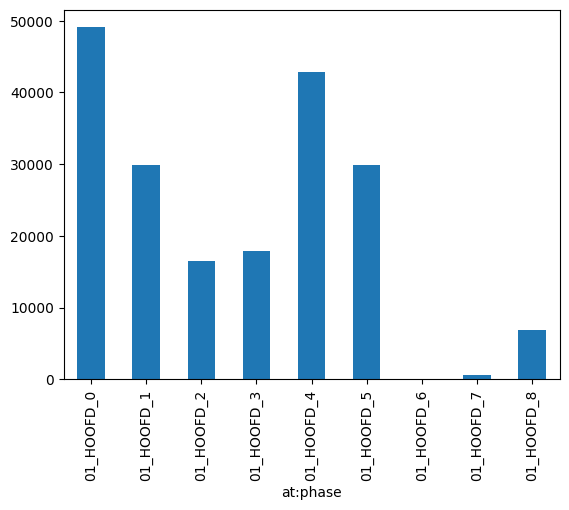

In [4]:
df_phase_events = df.groupby('at:phase').size()
df_phase_events.plot.bar()

In [5]:
df_res_events = df.groupby('Resource').size().sort_values(ascending=False).iloc[:]
print(df_res_events)
active_res = list(df_res_events.index)
print(active_res)

df = df[df['Resource'].isin(active_res)]

Resource
560781      12644
560454      10170
560872       9503
560530       9295
560673       9243
            ...  
1898401         9
13412010        9
3175153         7
10716070        5
560427          2
Length: 71, dtype: int64
[560781, 560454, 560872, 560530, 560673, 560604, 560752, 560602, 560532, 560749, 2670601, 560890, 560741, 3273854, 560458, 560600, 560852, 2013365, 560519, 560429, 1254625, 1550894, 560912, 560696, 560821, 560521, 560608, 560925, 8492512, 560598, 11744364, 5025869, 3442724, 560596, 560462, 560881, 560613, 9264148, 22445896, 4634935, 560849, 560812, 560950, 3122446, 560894, 560594, 6993893, 560589, 20987361, 9106499, 5726485, 560922, 12941730, 560999, 560431, 6925826, 560528, 560464, 6, 3069866, 13412649, 11345232, 560796, 4936828, 560713, 3148844, 1898401, 13412010, 3175153, 10716070, 560427]


<Axes: xlabel='at:phase'>

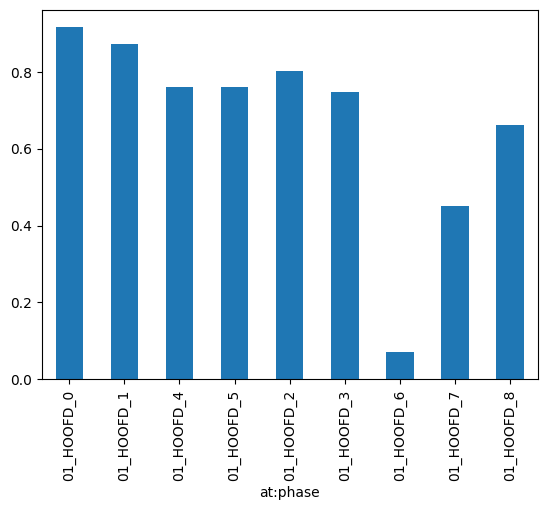

In [6]:
df_phase_resources = df.groupby(['at:phase'])['Resource'].nunique()
df_phase_resources = df_phase_resources[[
    '01_HOOFD_0', '01_HOOFD_1', '01_HOOFD_4', '01_HOOFD_5',
    '01_HOOFD_2',
    '01_HOOFD_3', 
    '01_HOOFD_6',
    '01_HOOFD_7',
    '01_HOOFD_8',
]]
df_phase_resources /= 71
df_phase_resources.plot.bar()

In [7]:
df_res_phase_events = df.groupby(['Resource', 'at:phase']).size()
df_res_phase_events = df_res_phase_events.unstack().loc[active_res]
df_res_phase_events = df_res_phase_events[[
    '01_HOOFD_0', '01_HOOFD_1', '01_HOOFD_4', '01_HOOFD_5',
    '01_HOOFD_2',
    '01_HOOFD_3', 
    '01_HOOFD_6',
    '01_HOOFD_7',
    '01_HOOFD_8',
]]
#df_res_phase_events = df_res_phase_events.div(df_res_phase_events.sum(axis=1), axis=0)

print(df_res_phase_events)

at:phase  01_HOOFD_0  01_HOOFD_1  01_HOOFD_4  01_HOOFD_5  01_HOOFD_2  \
Resource                                                               
560781        4063.0      1043.0      2944.0      3723.0       351.0   
560454        1506.0      2301.0      2838.0        80.0      1568.0   
560872        5441.0      1336.0       914.0       730.0       274.0   
560530        2236.0       831.0      2245.0      1728.0       691.0   
560673        3520.0       472.0      2059.0      2381.0       349.0   
...              ...         ...         ...         ...         ...   
1898401          NaN         6.0         NaN         NaN         3.0   
13412010         9.0         NaN         NaN         NaN         NaN   
3175153          7.0         NaN         NaN         NaN         NaN   
10716070         NaN         NaN         NaN         NaN         NaN   
560427           2.0         NaN         NaN         NaN         NaN   

at:phase  01_HOOFD_3  01_HOOFD_6  01_HOOFD_7  01_HOOFD_8  
Reso

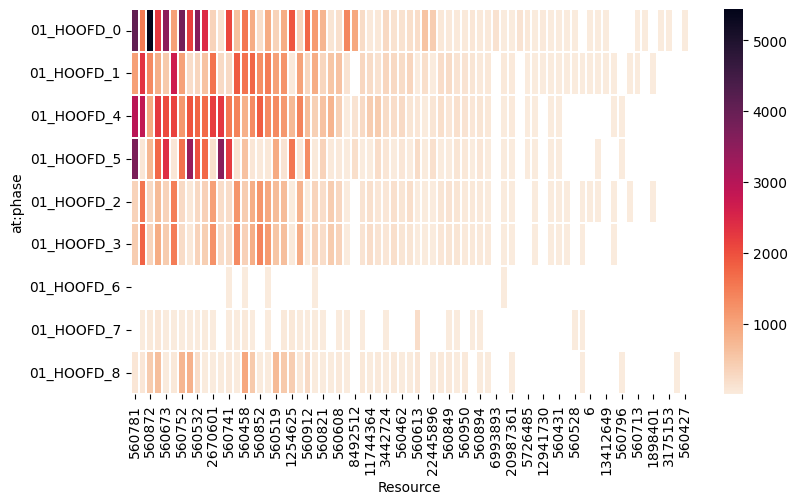

In [8]:
f, ax = plt.subplots(figsize=(9, 5))
sns.heatmap(df_res_phase_events.T, ax=ax, cmap='rocket_r', linewidth=.2)
plt.show()

In [9]:
df_weekday_phase_events = df.groupby(['tt:weekday', 'at:phase']).size()
df_weekday_phase_events = df_weekday_phase_events.unstack().loc[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
df_weekday_phase_events = df_weekday_phase_events[[
    '01_HOOFD_0', '01_HOOFD_1', '01_HOOFD_4', '01_HOOFD_5',
    '01_HOOFD_2',
    '01_HOOFD_3', 
    '01_HOOFD_6',
    '01_HOOFD_7',
    '01_HOOFD_8',
]]
# df_weekday_phase_events = df_weekday_phase_events.div(df_weekday_phase_events.sum(axis=1), axis=0)

print(df_weekday_phase_events)

at:phase    01_HOOFD_0  01_HOOFD_1  01_HOOFD_4  01_HOOFD_5  01_HOOFD_2  \
tt:weekday                                                               
Mon            10542.0      5373.0      7840.0      5033.0      2959.0   
Tue            10848.0      6742.0     11221.0      7346.0      4096.0   
Wed             9524.0      6627.0      9088.0      6710.0      3744.0   
Thu            10967.0      6546.0      8878.0      6118.0      3391.0   
Fri             6900.0      4228.0      5719.0      4416.0      2261.0   
Sat              157.0       316.0        82.0       223.0        41.0   
Sun              147.0         1.0         NaN         1.0         NaN   

at:phase    01_HOOFD_3  01_HOOFD_6  01_HOOFD_7  01_HOOFD_8  
tt:weekday                                                  
Mon             3209.0         1.0        57.0      1296.0  
Tue             4347.0         5.0       223.0      1672.0  
Wed             3960.0         6.0        84.0      1351.0  
Thu             3829.0      

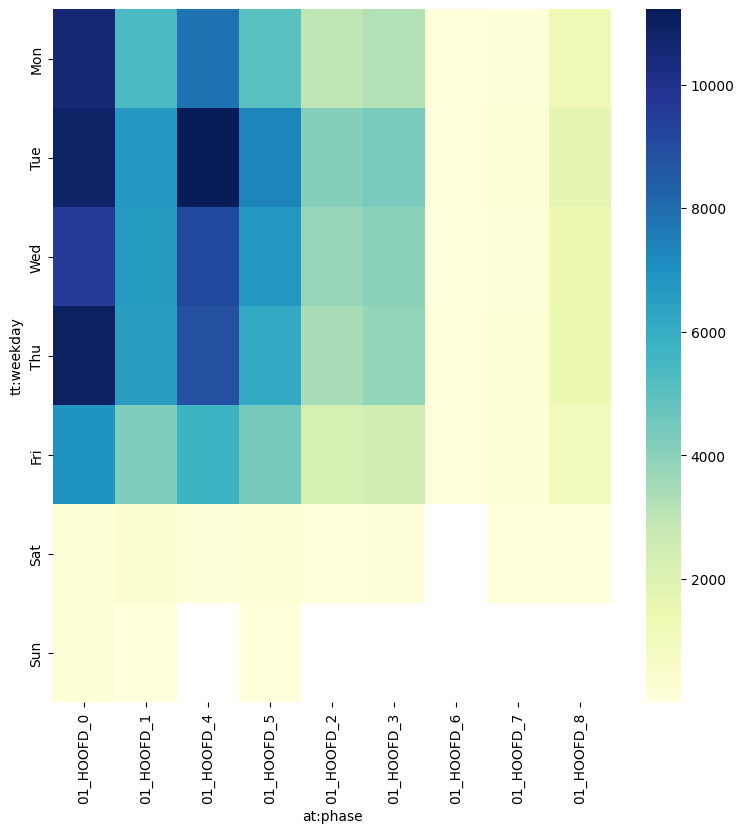

In [10]:
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df_weekday_phase_events, ax=ax, cmap='YlGnBu')
plt.show()

AT         0-1-4-5         2         3   6         7         8
Resource                                                      
560781    0.931114  0.027760  0.035195 NaN       NaN  0.005932
560454    0.661259  0.154179  0.176598 NaN  0.001180  0.006785
560872    0.886141  0.028833  0.034200 NaN  0.003052  0.047774
560530    0.757396  0.074341  0.094137 NaN  0.007639  0.066487
560673    0.912258  0.037758  0.049335 NaN  0.000433  0.000216
...            ...       ...       ...  ..       ...       ...
1898401   0.666667  0.333333       NaN NaN       NaN       NaN
13412010  1.000000       NaN       NaN NaN       NaN       NaN
3175153   1.000000       NaN       NaN NaN       NaN       NaN
10716070       NaN       NaN       NaN NaN       NaN  1.000000
560427    1.000000       NaN       NaN NaN       NaN       NaN

[71 rows x 6 columns]


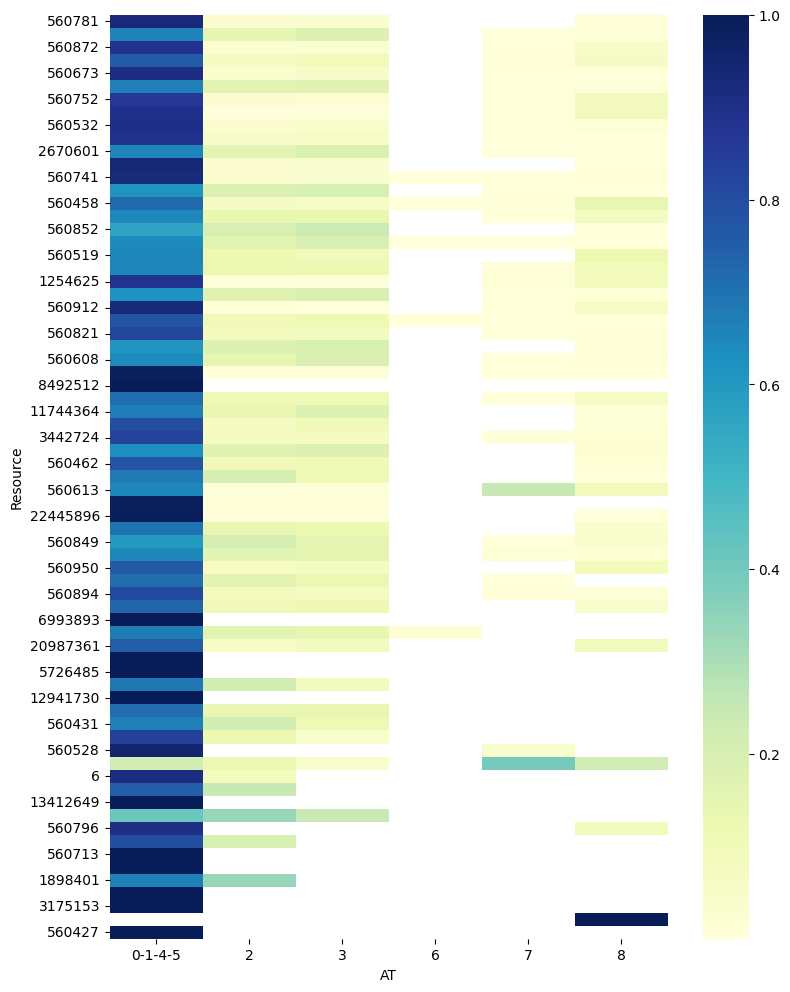

In [11]:
df_res_at_events = df.groupby(['Resource', 'AT']).size()
df_res_at_events = df_res_at_events.unstack().loc[active_res]
df_res_at_events = df_res_at_events.div(df_res_at_events.sum(axis=1), axis=0)
print(df_res_at_events)
f, ax = plt.subplots(figsize=(9, 12))
sns.heatmap(df_res_at_events, ax=ax, cmap='YlGnBu')
plt.show()

TT        M-T-W-T-F       Sat       Sun
Resource                               
560781     0.999130  0.000237  0.000633
560454     0.987807  0.012094  0.000098
560872     0.996633  0.002631  0.000737
560530     0.999247  0.000323  0.000430
560673     0.994482  0.004328  0.001190
...             ...       ...       ...
1898401    1.000000       NaN       NaN
13412010   1.000000       NaN       NaN
3175153    1.000000       NaN       NaN
10716070   1.000000       NaN       NaN
560427     1.000000       NaN       NaN

[71 rows x 3 columns]


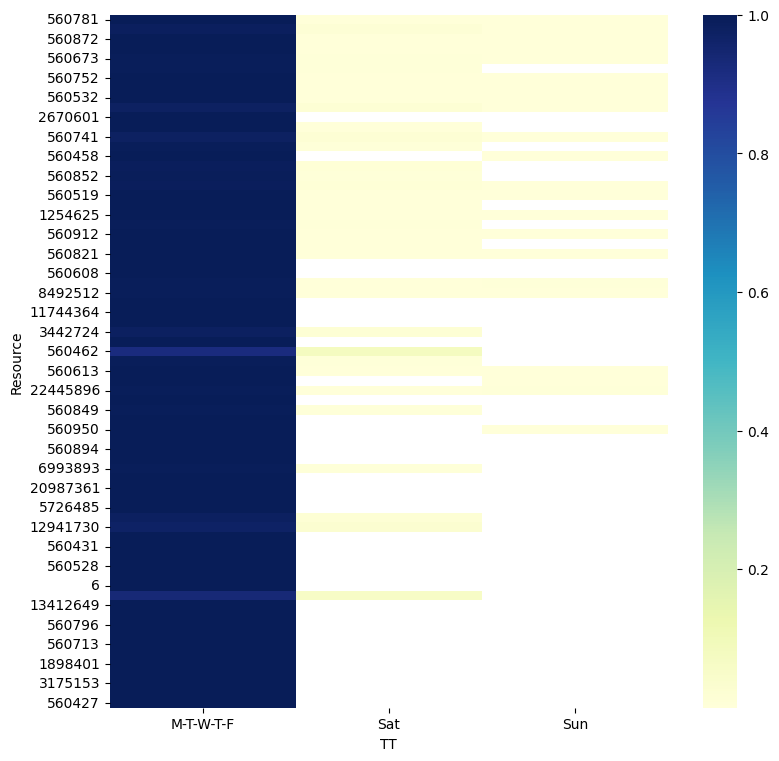

In [12]:
df_res_tt_events = df.groupby(['Resource', 'TT']).size()
df_res_tt_events = df_res_tt_events.unstack().loc[active_res]
df_res_tt_events = df_res_tt_events.div(df_res_tt_events.sum(axis=1), axis=0)
print(df_res_tt_events)
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df_res_tt_events, ax=ax, cmap='YlGnBu')
plt.show()

TT       M-T-W-T-F    Sat    Sun
AT                              
0-1-4-5   150666.0  778.0  149.0
2          16451.0   41.0    NaN
3          17836.0   49.0    NaN
6             15.0    NaN    NaN
7            585.0    2.0    NaN
8           6871.0   10.0    NaN


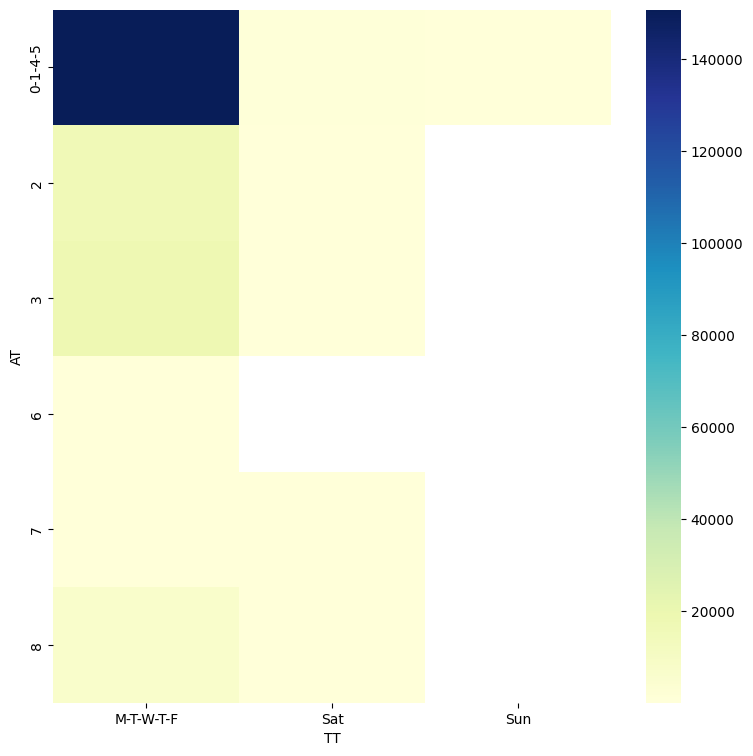

In [13]:
df_at_tt_events = df.groupby(['AT', 'TT']).size()
df_at_tt_events = df_at_tt_events.unstack()
#df_at_tt_events = df_at_tt_events.div(df_at_tt_events.sum(axis=1), axis=0)
print(df_at_tt_events)
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df_at_tt_events, ax=ax, cmap='YlGnBu')
plt.show()

TT       M-T-W-T-F   Sat   Sun
AT                            
0-1-4-5       70.0  35.0  22.0
2             57.0   6.0   NaN
3             53.0   6.0   NaN
6              5.0   NaN   NaN
7             32.0   2.0   NaN
8             47.0   1.0   NaN


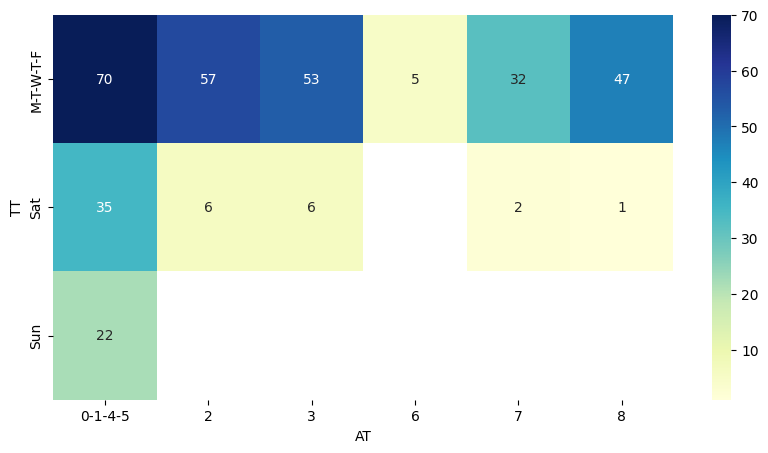

In [14]:
total_num_res = df['Resource'].nunique()

df_at_tt_res = df.groupby(['AT', 'TT'])['Resource'].nunique()
df_at_tt_res = df_at_tt_res.unstack()
#df_at_tt_events = df_at_tt_events.div(df_at_tt_events.sum(axis=1), axis=0)
print(df_at_tt_res)
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_at_tt_res.T, ax=ax, cmap='YlGnBu', annot=True)
plt.show()

0     [560852, 1254625, 3148844, 560532, 560749, 560...
1     [560849, 560532, 560604, 560872, 560600, 56053...
2     [560849, 560429, 560604, 560532, 560922, 56087...
3     [560600, 3442724, 560613, 560821, 560530, 5607...
4     [560532, 560673, 560454, 2013365, 560922, 5609...
5     [560429, 560925, 560528, 560872, 560741, 56053...
6     [560602, 1254625, 560749, 560752, 560821, 5607...
7     [1550894, 560604, 3273854, 560600, 560462, 560...
8     [1550894, 560604, 3273854, 560600, 560462, 560...
9             [2013365, 560458, 560696, 560741, 560589]
10                                             [560519]
11                                     [560600, 560429]
Name: Resource, dtype: object
[560429, 560454, 560458, 560462, 560519, 560530, 560532, 560589, 560600, 560602, 560604, 560613, 560673, 560696, 560741, 560749, 560752, 560781, 560821, 560852, 560872, 560912, 560925, 560950, 1254625, 1550894, 2013365, 3273854, 8492512, 9264148, 22445896]
31
Resource
560781      12644
560454     

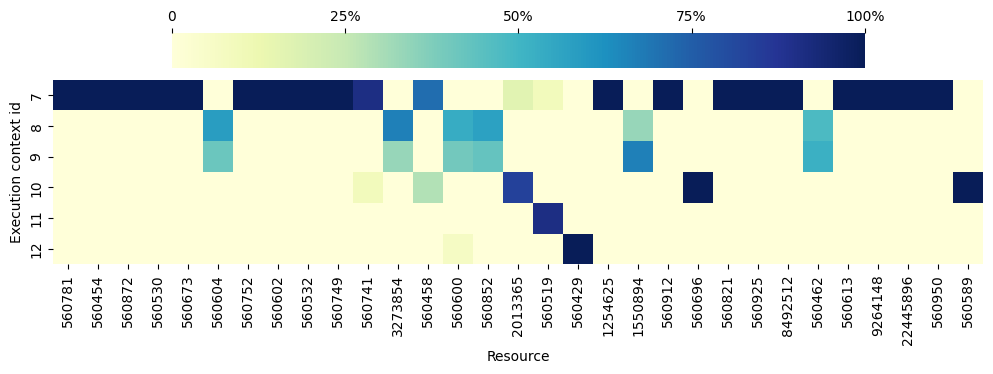

In [15]:
df_co_events = df.groupby(['AT', 'TT']).size().reset_index().sort_values(0, ascending=False)
df_co_events = df_co_events.rename(columns={0: 'n_events'}).reset_index()[['AT', 'TT', 'n_events']]
#print(df_co_events)

df_co_res = df.groupby(['AT', 'TT'])['Resource'].unique()

df_x = df_co_events.join(df_co_res, on=['AT', 'TT'])
print(df_x['Resource'])

all_resources = sorted(df['Resource'].unique())

# vecs = []
# for i, res in enumerate(df_x['Resource']):
#     l = [0] * len(all_resources)
#     for r in res:
#         idx = all_resources.index(r)
#         l[idx] = 1
#     vecs.append(l)

# import numpy as np
# vecs = np.array(vecs)

# print(vecs)

from collections import defaultdict

selected_resources = set()

# Jaccard distance
co_resources = []

for i, res in enumerate(df_x['Resource']):
    #print(set(sorted(res)))
    if i >= 6:
        for r in res:
            selected_resources.add(r)
    co_resources.append(set(res))

print(sorted(selected_resources))
print(len(selected_resources))

selected_resources = sorted(selected_resources, key=lambda x: active_res.index(x))
print(df_res_events.loc[selected_resources])
    
df_res_co_events = defaultdict(lambda: defaultdict(lambda: 0))
for key, events in df.groupby(['Resource', 'AT', 'TT']):
    r = key[0]
    at = key[1]
    tt = key[2]
    if at == '0-1-4-5' and tt == 'Sun':
        co = '7'
    elif at == '3' and tt == 'Sat':
        co = '8'
    elif at == '2' and tt == 'Sat':
        co = '9'
    elif at == '6' and tt == 'M-T-W-T-F':
        co = '10'
    elif at == '8' and tt == 'Sat':
        co = '11'
    elif at == '7' and tt == 'Sat':
        co = '12'
    else:
        co = 'others'
    df_res_co_events[r][co] = len(events)
        
df_res_co_events = pd.DataFrame(df_res_co_events).fillna(0).T
df_res_co_events = df_res_co_events[['7', '8', '9', '10', '11', '12']]
df_res_co_events = df_res_co_events.loc[selected_resources]
df_res_co_events = df_res_co_events.div(df_res_co_events.sum(axis=1), axis=0)

mat_jac_dist = defaultdict(lambda: defaultdict(lambda: 0))

for i in range(len(co_resources)):
    for j in range(len(co_resources)):
        u = co_resources[i]
        v = co_resources[j]
        mat_jac_dist[i+1][j+1] = 1 - len(u.intersection(v)) / len(u.union(v))

print(mat_jac_dist)

df_jac_dist = pd.DataFrame(mat_jac_dist).loc[1:7][list(range(1, 7+1))]
#df_jac_dist

f, ax = plt.subplots(figsize=(12, 3))
sns.heatmap(df_res_co_events.T, ax=ax, cmap='YlGnBu', annot=False, cbar_kws = dict(use_gridspec=False,location="top"))
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .5, .75, 1])
cbar.set_ticklabels(['0', '25%', '50%', '75%', '100%'])
plt.xlabel("Resource")
plt.ylabel("Execution context id")
plt.show()
f.savefig("plot.pdf", bbox_inches='tight')

In [16]:
from scipy.spatial.distance import pdist, squareform
mat_dis = squareform(pdist(vecs, metric='hamming'))

#print(mat_dis)

df_dist = pd.DataFrame(mat_dis, columns=df_x.index, index=df_x.index)

print(df_dist)

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_dist, ax=ax, cmap='rocket')
plt.show()

NameError: name 'vecs' is not defined